In [ ]:
#Goal: Predict medical charges based on age, BMI, smoking status, etc.
#Target column: charges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
#Inspecting the Data

In [2]:
print(df.info()) #for data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [3]:
print(df.describe()) #for descriptive stats

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [4]:
print(df.isnull().sum()) #To check for missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
#Visualizing Distributions

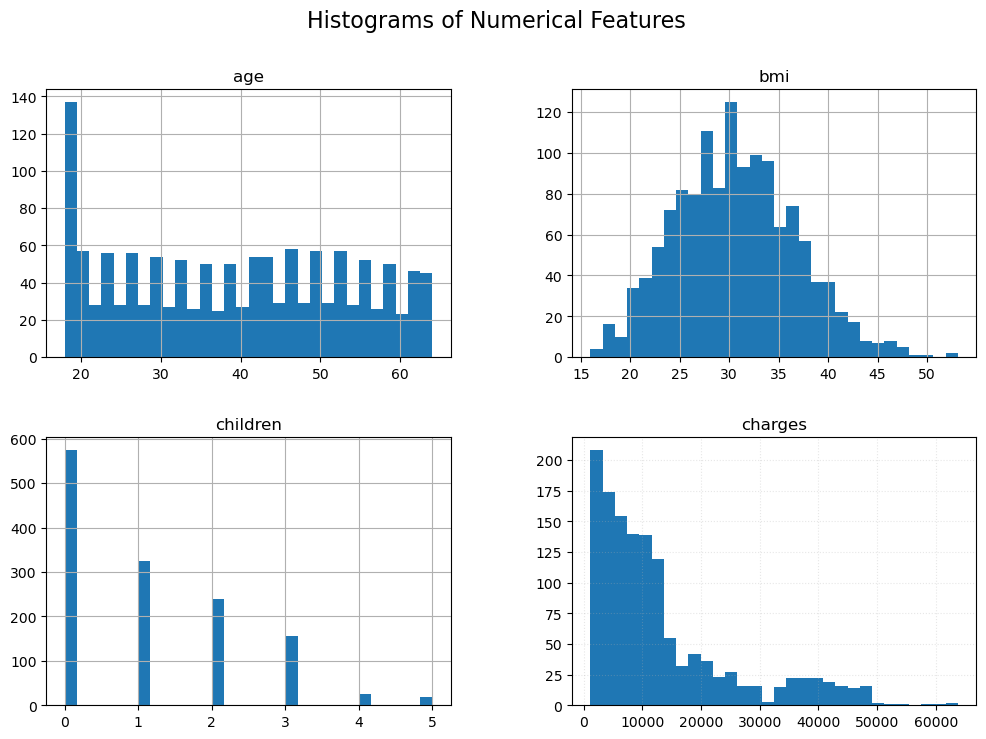

In [5]:
# Histogram for numeric variables
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.grid(True, alpha=0.3,linestyle=":")
plt.show()

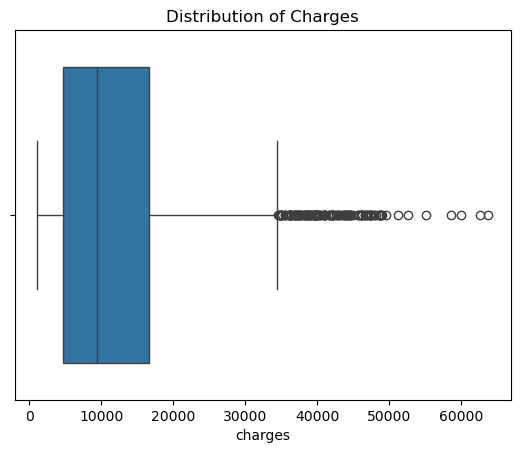

In [6]:
# Boxplot to check for outliers in 'charges'
sns.boxplot(data=df, x='charges')
plt.title('Distribution of Charges')
plt.show()

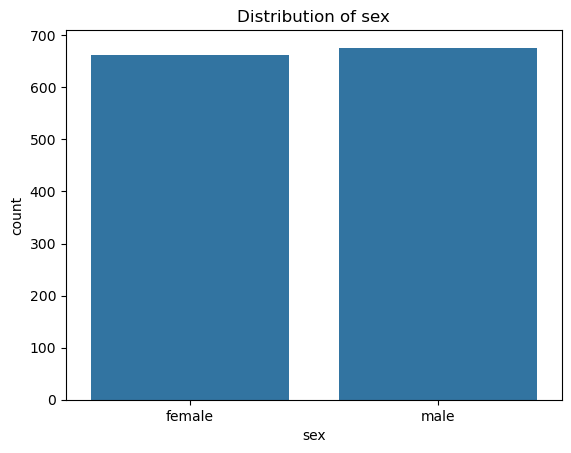

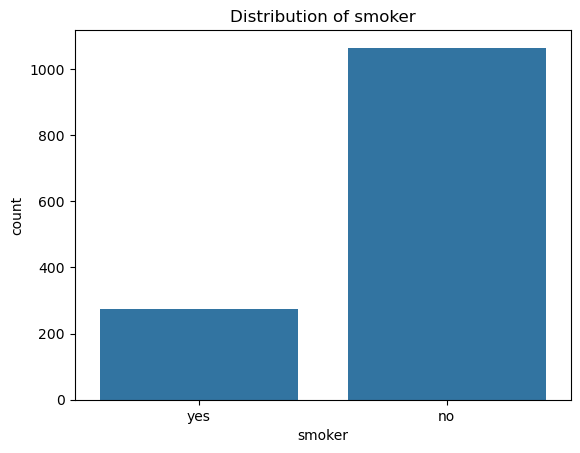

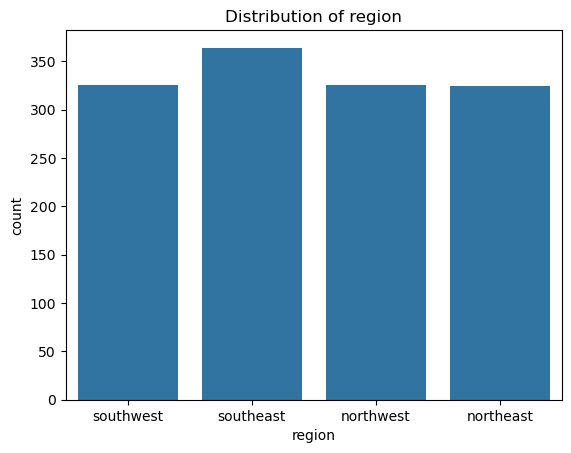

In [7]:
# Count plots for categoricals
for col in ['sex', 'smoker', 'region']:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


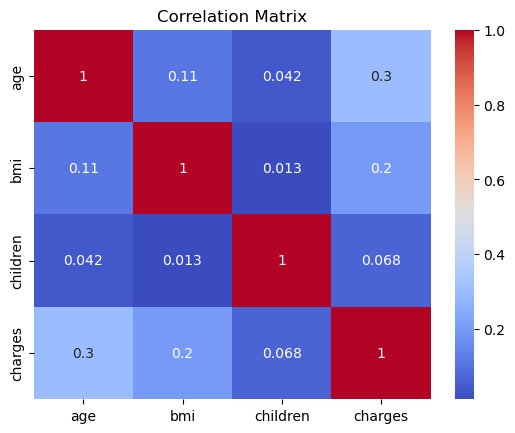

In [9]:
#coorelation heatmap

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('charges', axis=1)  # or 'log_charges' if using transformed target
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#Building and evaluting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [13]:
# R^2 score
print("R^2 score:", r2_score(y_test, y_pred))

R^2 score: 0.7835929767120724


In [14]:
# Mean Squared Error
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 33596915.85136145


In [15]:
# Root Mean Squared Error
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 5796.284659276273


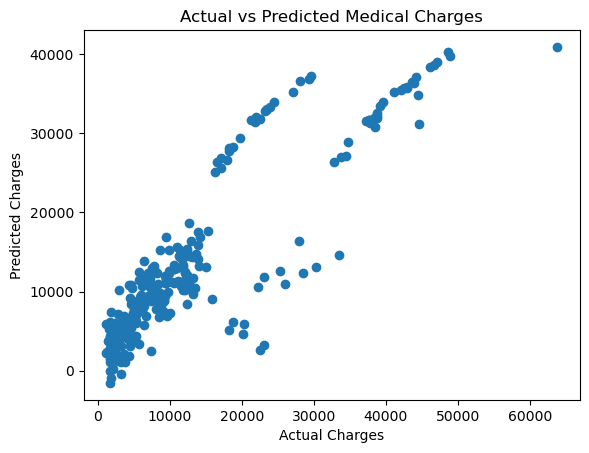

In [16]:
#Plot Predictions vs Actual data
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
df_encoded['log_charges'] = np.log(df_encoded['charges'])
y = df_encoded['log_charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

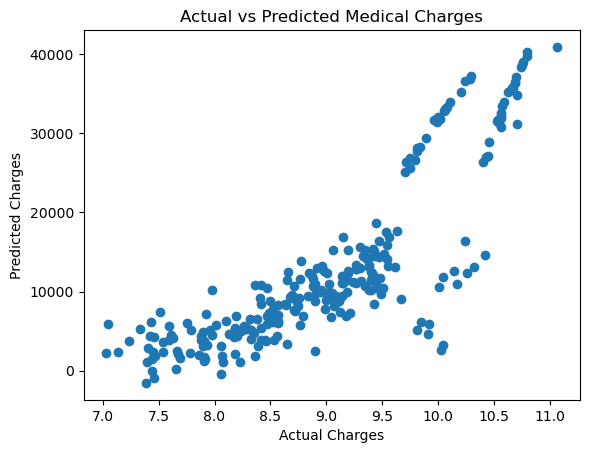

In [18]:
#Plot Predictions vs Actual data
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Added import for np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

print("R²:", r2_score(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

R²: 0.6065730962548852
RMSE: 7815.307271065234


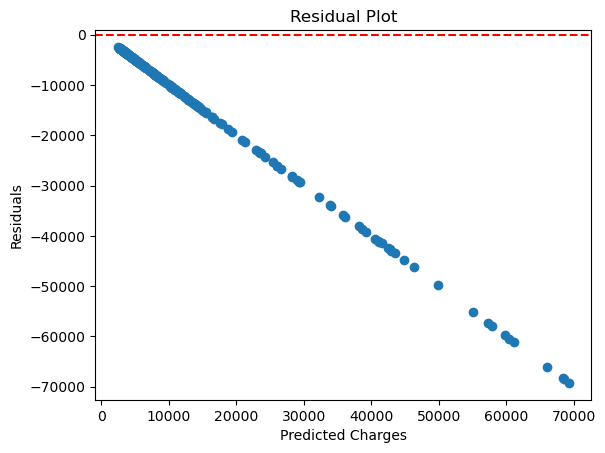

In [21]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [34]:
coef_df = pd.DataFrame({"Feature": X.columns,"Coefficient": model.coef_})
print(coef_df)

            Feature  Coefficient
0               age     0.034245
1               bmi     0.013600
2          children     0.092448
3          sex_male    -0.074350
4        smoker_yes     1.551698
5  region_northwest    -0.056414
6  region_southeast    -0.136068
7  region_southwest    -0.122557


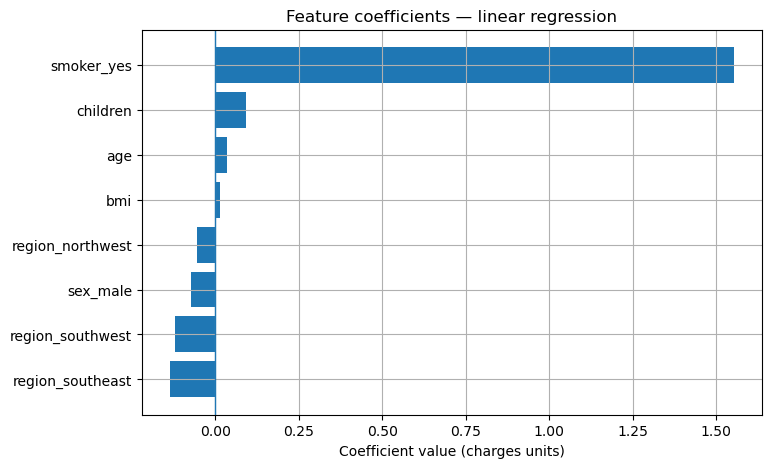

In [39]:
# assume coef_df from above
coef_df_sorted = coef_df.sort_values('Coefficient')
plt.figure(figsize=(8,5))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'])
plt.axvline(0, linewidth=1)
plt.xlabel('Coefficient value (charges units)')
plt.title('Feature coefficients — linear regression')
plt.grid()
plt.show()

In [38]:
def predict_manual(features_dict):
    s = intercept
    for k,v in features_dict.items():
        s += coeffs.get(k, 0) * v
    return s

# encode a patient (example: age=45,bmi=30,children=2,sex_male=1,smoker_yes=1,region_southeast=1)
patient = {'age':45,'bmi':30,'children':2,'sex_male':,'smoker_yes':1,'region_southeast':1}
print("Predicted charges:", predict_manual(patient))

Predicted charges: 2002.8060509999998
